# Plot boundaries


## Setup

Import the following packages:

In [3]:
import numpy as np
import pandas as pd

import geopandas
import matplotlib.pyplot as plt

Look for data in these places:

In [11]:
paths = dict(
    dir_data_input = '../data_example/',
    dir_data_geojson = '../data_geojson/ons_data/',
    dir_data_tabular = '../data_tabular/',
    values_file = 'example_lsoa_englandwales.csv',
    lsoa_geojson = 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    lsoa_regions = 'LSOA_regions.csv',
    stroke_hospitals = 'stroke_hospitals_2022.csv'
)

Read in this file of region information for each LSOA. It includes the following data:

| Column name | Description | Usage |
| --- | --- | --- | 
| LSOA11 CD / NM | LSOA 2011 codes / names | England & Wales |
| long / lat | Longitude and latitude of the centroid of the LSOA | England & Wales |
| CCG19 CD / NM | Clinical Commissioning Groups 2019 codes / names | England |
| ICB22 CD / NM | Integrated Care Board 2022 codes / names. Replacement for CCGs. | England |
| STP19 CD / NM | Sustainability and Transformation Partnerships codes / names (~similar to counties) | England |
| LHB20 CD / NM / NMW | Local Health Boards 2020 codes / names / Welsh names | Wales |
| RGN11 CD / NM | Region codes / names. Gives specific regions within England, but Wales and Scotland just get the country name. | England & Wales |
| LAD17 CD / NM | Local Authority District 2017 codes / names | England & Wales |
| SCN17 CD/NM | Strategic Clinical Network 2017 codes / names | England |

In [5]:
region_file = f"{paths['dir_data_tabular']}{paths['lsoa_regions']}"
lsoa_regions = pd.read_csv(region_file)

In [6]:
lsoa_regions.columns

Index(['LSOA11CD', 'LSOA11NM', 'LSOA11LONG', 'LSOA11LAT', 'CCG19CD', 'CCG19NM',
       'STP19CD', 'STP19NM', 'LHB20CD', 'LHB20NM', 'LHB20NMW', 'LAD17CD',
       'LAD17NM', 'SCN17CD', 'SCN17NM', 'RGN11CD', 'RGN11NM'],
      dtype='object')

In [7]:
lsoa_regions.index

RangeIndex(start=0, stop=34752, step=1)

In [8]:
boundary_files = {
    'LSOA':'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    'CCG':'Clinical_Commissioning_Groups_April_2019_Boundaries_EN_BGC_2022_-7963862461000886750.geojson',
    'ICB':'ICB_JUL_2022_EN_BGC_V3_7901616774526941461.geojson',
    'LAD':'LAD_Dec_2017_GCB_GB_2022_5230662237199919616.geojson',
    'STP':'STP_Apr_2019_GCB_in_England_2022_3138810296697318496.geojson',
    'LHB':'Local_Health_Boards_April_2020_WA_BGC_2022_94310626700012506.geojson',
    'SCN':'SCN_Dec_2016_GCB_in_England_2022_8470122845735728627.geojson',
    'RGN':'Regions_December_2022_EN_BGC_4589208765943883498.geojson',
}

In [9]:
boundary_file = boundary_files['SCN']


In [12]:
geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')

In [13]:
df_geojson

,OBJECTID,scn16cd,scn16nm,bng_e,bng_n,long,lat,GlobalID,geometry
0,1,E55000002,Cheshire and Merseyside,374405,380936,-2.385720,53.324730,255a0666-075d-46c3-883b-91926861afc5,"MULTIPOLYGON (((336376.599 422601.901, 336404...."
1,2,E55000003,"Greater Manchester, Lancashire and South Cumbria",362045,447378,-2.579400,53.921150,a950d40f-7426-47db-a164-33d4e20bb8bf,"MULTIPOLYGON (((334374.698 512086.596, 334360...."
2,3,E55000004,Northern England,386194,549585,-2.216500,54.840889,91880e4a-6c04-4b64-9427-483b5d83aa1c,"MULTIPOLYGON (((398253.902 652833.898, 398317...."
3,4,E55000005,Yorkshire and The Humber,426652,443114,-1.596030,53.883549,33c8ad95-5957-4271-b112-e11a650b64fc,"MULTIPOLYGON (((478203.003 518916.601, 478373...."
4,5,E55000006,East of England,571074,263229,0.504146,52.240669,2c769455-a5ad-40f2-99b3-8a2a045a3b8e,"MULTIPOLYGON (((600697.699 346562.497, 601108...."
5,6,E55000007,East Midlands,477660,304146,-0.854030,52.629539,0c0f672f-d125-4c76-8ea5-4958f1792f38,"MULTIPOLYGON (((512490.996 414654.696, 512679...."
6,7,E55000008,West Midlands,386294,295477,-2.203580,52.556969,185c7437-afd8-4e98-9754-0c87d0dd5fbd,"POLYGON ((403387.797 368314.900, 403515.999 36..."
7,8,E55000009,South West,285015,102567,-3.633430,50.811192,a93689eb-7e4f-42ff-b858-c3f3cb2223c5,"MULTIPOLYGON (((416693.503 245007.097, 416810...."
8,9,E55000010,South East Coast,555276,135827,0.216373,51.100719,d4dabcb2-370b-4404-b536-a6bb3a9b3057,"MULTIPOLYGON (((577424.101 179270.704, 577408...."
9,10,E55000011,Thames Valley,459681,205725,-1.136910,51.747051,ed3a16e4-74ac-46f5-ac15-5572c581a617,"POLYGON ((446553.800 251430.398, 446526.501 25..."


In [36]:
boundary_colour_dict = {
    'LSOA':'LightGrey',
    'CCG':'y',
    'ICB':'m',
    'LAD':'g',
    'STP':'r',
    'LHB':'b',
    'SCN':'b',
    'RGN':'k',
}

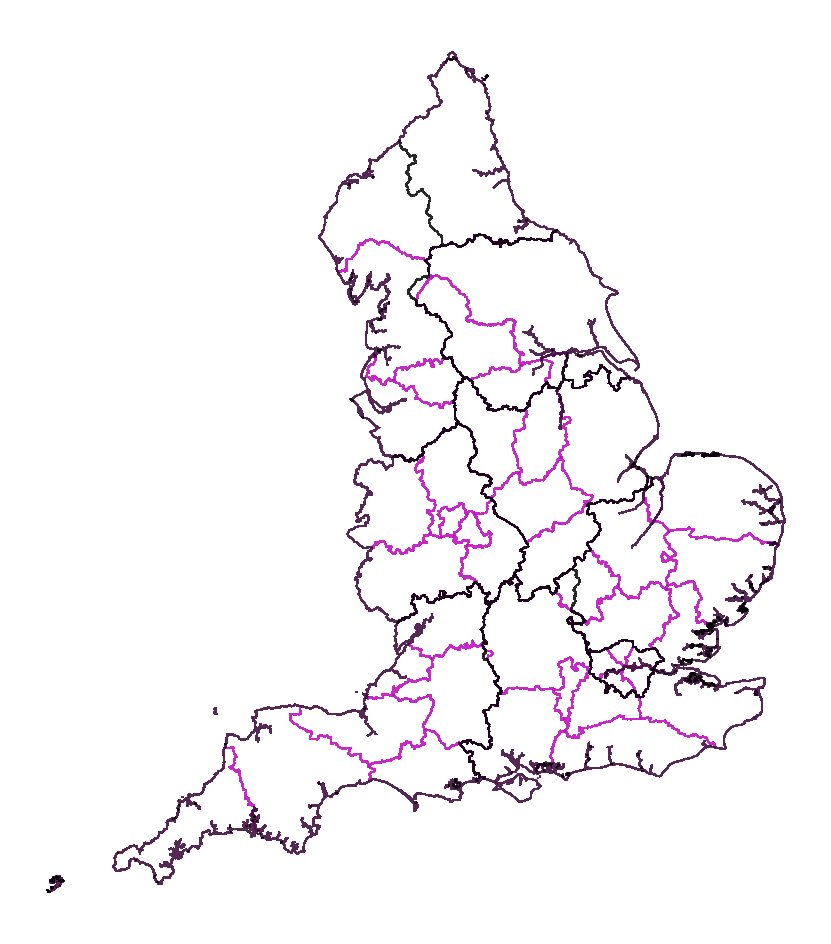

In [39]:
fig, ax = plt.subplots(figsize=(12, 12)) # Make max dimensions XxY inch

boundaries_here = ['ICB', 'RGN']

for b, boundary_type in enumerate(boundaries_here):
    boundary_file = boundary_files[boundary_type]
    geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
    df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')
    
    boundary_colour = boundary_colour_dict[boundary_type]
    
    # Draw the main map with colours (choropleth):
    df_geojson.plot(
        ax=ax,              # Set which axes to use for plot (only one here)
        # column='OBJECTID',     # Column to apply colour
        antialiased=False,  # Avoids artifact boundry lines
        # edgecolor='face',   # Make LSOA boundry same colour as area
        facecolor='none',
        alpha=0.6,
        edgecolor=boundary_colour,
        # vmin=-range,        # Manual scale min (remove to make automatic)
        # vmax=range,         # Manual scale max (remove to make automatic)
        # cmap='viridis',     # Colour map to use
        legend_kwds={
            'shrink':0.5,   # Adjust size of colourmap key
            'label':'Dummy data'  # Add label
        },
        legend=True         # Set to display legend
        )

ax.set_axis_off()  # Turn off axis line and numbers
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

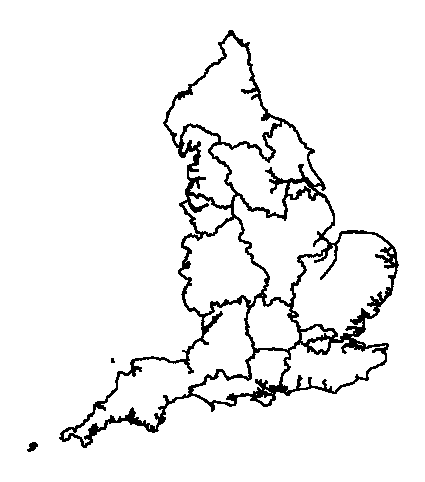

In [21]:
fig, ax = plt.subplots(figsize=(6, 6)) # Make max dimensions XxY inch

# Draw the main map with colours (choropleth):
df_geojson.plot(
    ax=ax,              # Set which axes to use for plot (only one here)
    # column='OBJECTID',     # Column to apply colour
    antialiased=False,  # Avoids artifact boundry lines
    # edgecolor='face',   # Make LSOA boundry same colour as area
    facecolor='None',
    edgecolor='k',   # Make LSOA boundry same colour as area
    # vmin=-range,        # Manual scale min (remove to make automatic)
    # vmax=range,         # Manual scale max (remove to make automatic)
    # cmap='viridis',     # Colour map to use
    legend_kwds={
        'shrink':0.5,   # Adjust size of colourmap key
        'label':'Dummy data'  # Add label
    },
    legend=True         # Set to display legend
    )

ax.set_axis_off()  # Turn off axis line and numbers
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()